In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('thyroidDF.csv')

# **Data plotting and description (before)**

In [3]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


In [4]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [6]:
df["on_thyroxine"].value_counts()

f    7932
t    1240
Name: on_thyroxine, dtype: int64

In [7]:
df["pregnant"].value_counts()

f    9065
t     107
Name: pregnant, dtype: int64

In [8]:
df["target"].value_counts()

-      6771
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
S        85
GK       49
AK       46
J        30
B        21
MK       16
Q        14
O        14
C|I      12
KJ       11
GI       10
H|K       8
D         8
FK        6
C         6
P         5
MI        2
LJ        1
GKJ       1
OI        1
D|R       1
E         1
Name: target, dtype: int64

In [9]:
df.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'on_thyroxine'}>,
        <AxesSubplot:title={'center':'query_on_thyroxine'}>,
        <AxesSubplot:title={'center':'on_antithyroid_meds'}>,
        <AxesSubplot:title={'center':'sick'}>],
       [<AxesSubplot:title={'center':'pregnant'}>,
        <AxesSubplot:title={'center':'thyroid_surgery'}>,
        <AxesSubplot:title={'center':'I131_treatment'}>,
        <AxesSubplot:title={'center':'query_hypothyroid'}>,
        <AxesSubplot:title={'center':'query_hyperthyroid'}>],
       [<AxesSubplot:title={'center':'lithium'}>,
        <AxesSubplot:title={'center':'goitre'}>,
        <AxesSubplot:title={'center':'tumor'}>,
        <AxesSubplot:title={'center':'hypopituitary'}>,
        <AxesSubplot:title={'center':'psych'}>],
       [<AxesSubplot:title={'center':'TSH_measured'}>,
        <AxesSubplot:title={'center':'TSH'}>,
        <AxesSubplot:title={'center':'T3_measured'}>,
        <AxesSubplot:title={'cent

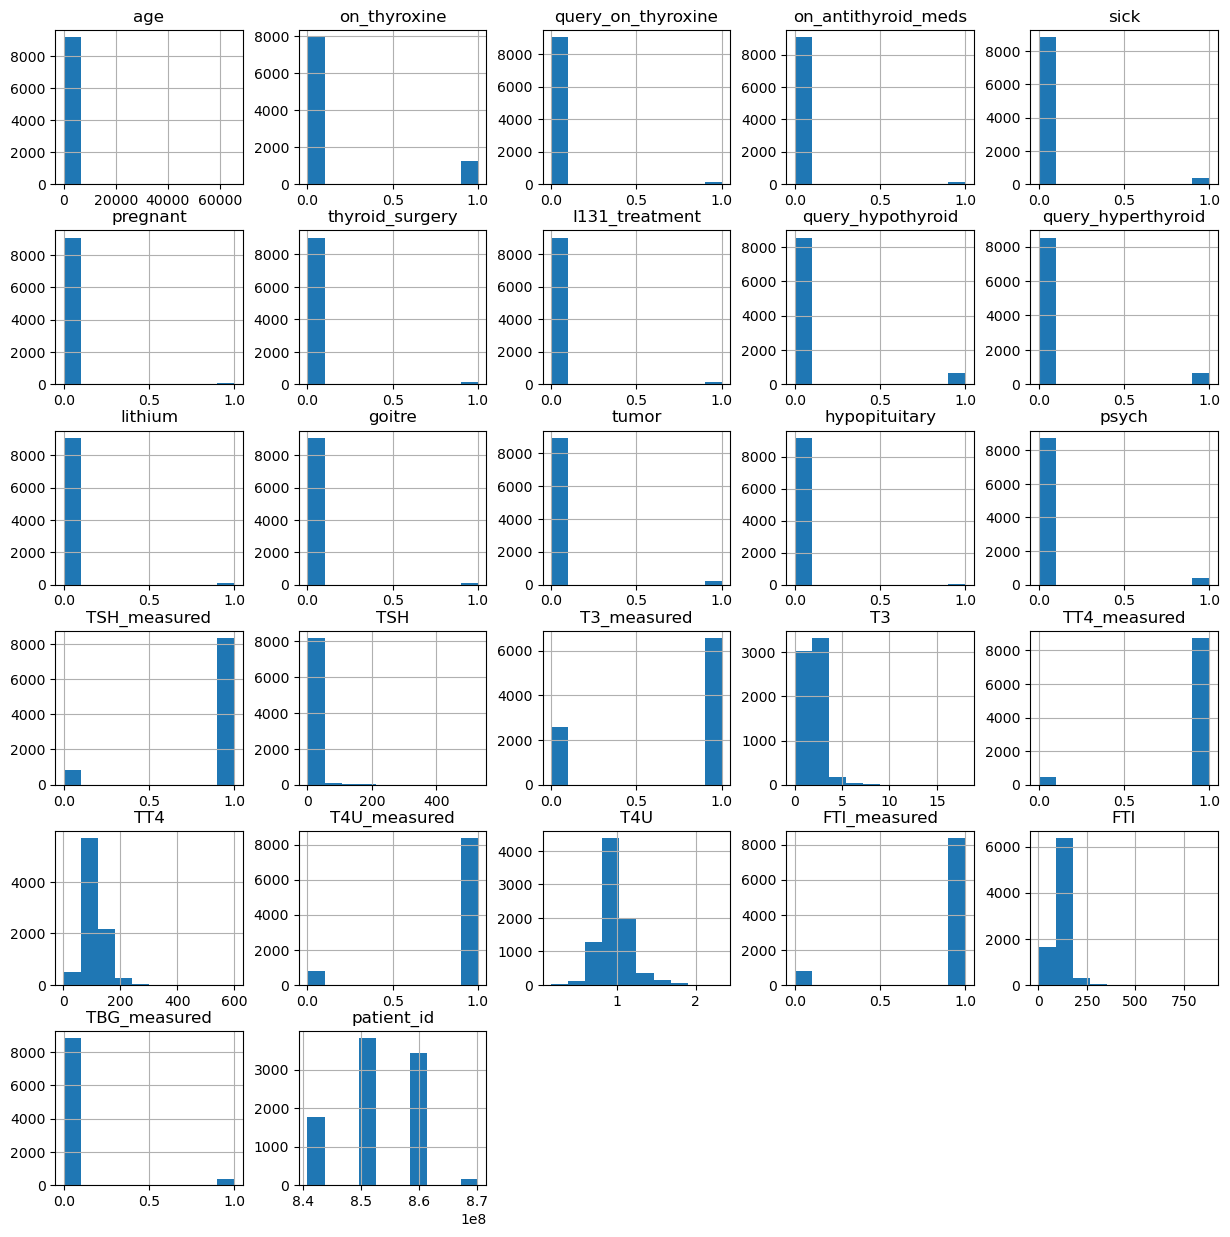

In [18]:
df.hist(figsize=(15,15))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


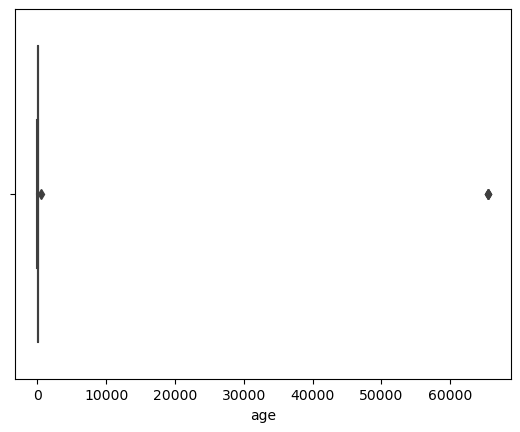

In [19]:
sns.boxplot(df.age)
#plt.xlim(-10, 120)
plt.show()

# **Data cleaning**

In [10]:
df=df.replace({"t":1,"f":0})

In [11]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,0,0,0,0,0,0,0,1,...,NaN,0,NaN,0,NaN,0,NaN,other,-,840801013
1,29,F,0,0,0,0,0,0,0,0,...,128.0,0,NaN,0,NaN,0,NaN,other,-,840801014
2,41,F,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,1,11.0,other,-,840801042
3,36,F,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,1,26.0,other,-,840803046
4,32,F,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,1,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,0,0,0,0,0,0,0,0,...,64.0,1,0.83,1,77.0,0,NaN,SVI,-,870119022
9168,22,M,0,0,0,0,0,0,0,0,...,91.0,1,0.92,1,99.0,0,NaN,SVI,-,870119023
9169,69,M,0,0,0,0,0,0,0,0,...,113.0,1,1.27,1,89.0,0,NaN,SVI,I,870119025
9170,47,F,0,0,0,0,0,0,0,0,...,75.0,1,0.85,1,88.0,0,NaN,other,-,870119027


In [12]:
del df["TBG"]

In [13]:
df.loc[(df['pregnant'] == '1') & (df['sex'].isnull()), 'sex'] = 'F'

In [14]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [15]:
df['age'].isnull().sum()

0

In [16]:
percentile25 = df['age'].quantile(0.25)
percentile75 = df['age'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df[df['age'] > upper_limit]
df[df['age'] < lower_limit]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,target,patient_id


In [17]:
new_df = df[df['age'] < upper_limit]
new_df.shape

(9168, 30)

In [18]:
df['TSH'].fillna(df['TSH'].mean(), inplace=True)

In [19]:
df['TT4'].fillna(df['TT4'].mean(), inplace=True)

In [20]:
df['T4U'].fillna(df['T4U'].mean(), inplace=True)

In [21]:
df['T3'].fillna(df['T3'].mean(), inplace=True)

In [22]:
df['FTI'].fillna(df['FTI'].mean(), inplace=True)

In [23]:
df[df.duplicated()]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,target,patient_id


In [24]:
df.duplicated("patient_id").sum()

0

# **Data plotting and description (after)**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

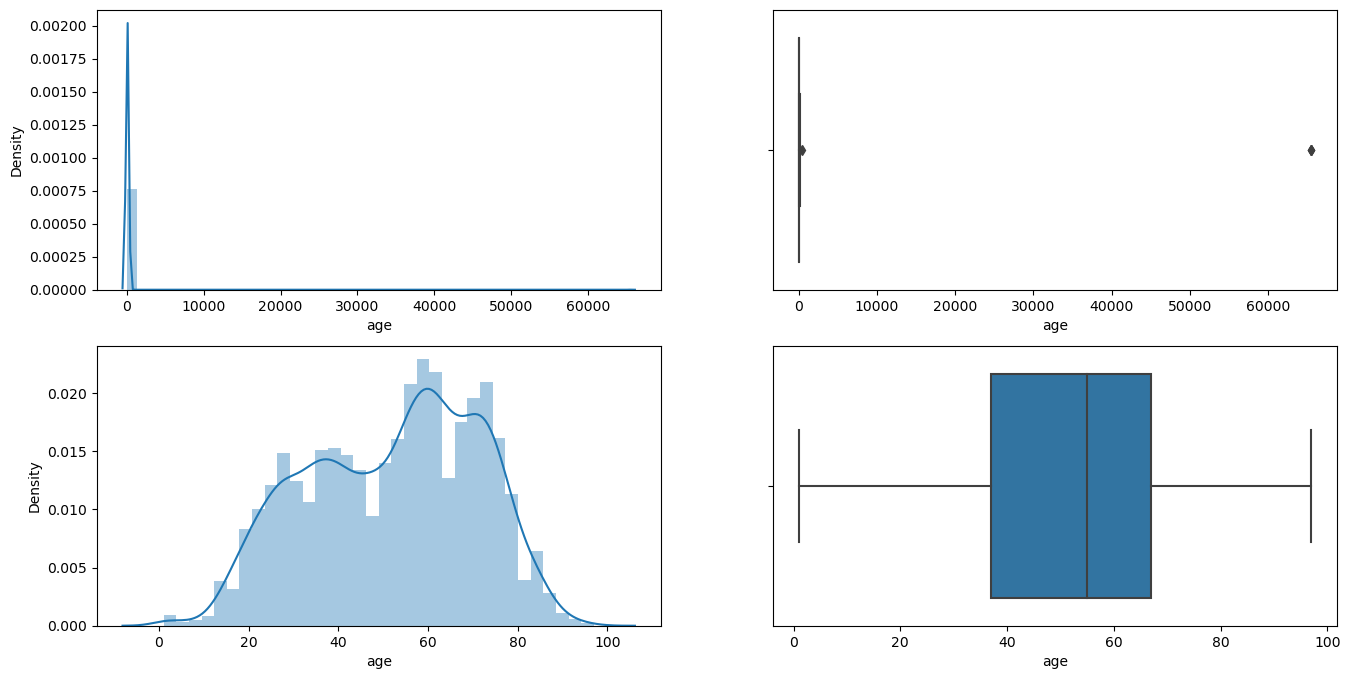

In [60]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['age'])
plt.subplot(2,2,2)
sns.boxplot(df['age'])
plt.subplot(2,2,3)
sns.distplot(new_df['age'])
plt.subplot(2,2,4)
sns.boxplot(new_df['age'])
plt.show()

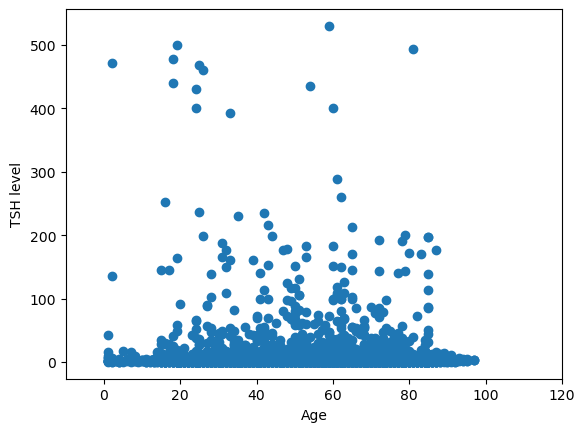

In [24]:
plt.scatter(df.age, df.TSH)
plt.xlabel("Age")
plt.ylabel("TSH level")
plt.xlim(-10, 120)
plt.show()

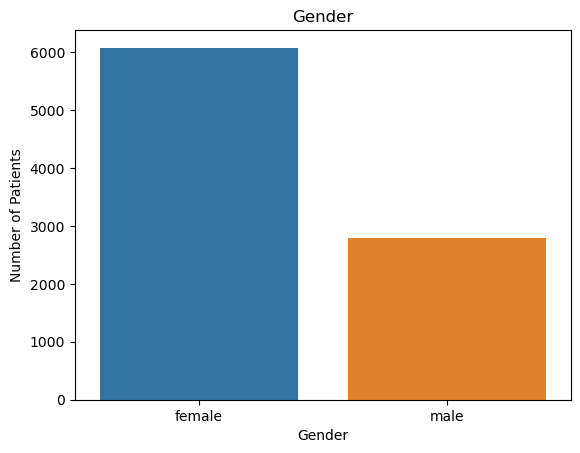

In [25]:
sns.countplot(data = df, x ='sex')
plt.title('Gender')
plt.xticks([0, 1], ['female', 'male'])
plt.xlabel('Gender')
plt.ylabel('Number of Patients');

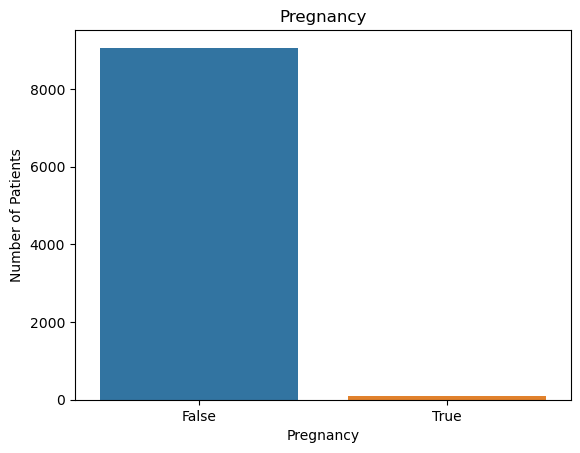

In [26]:
sns.countplot(data = df, x ='pregnant')
plt.title('Pregnancy')
plt.xticks([0, 1], ['False', 'True'])
plt.xlabel('Pregnancy')
plt.ylabel('Number of Patients');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='T3', ylabel='Density'>

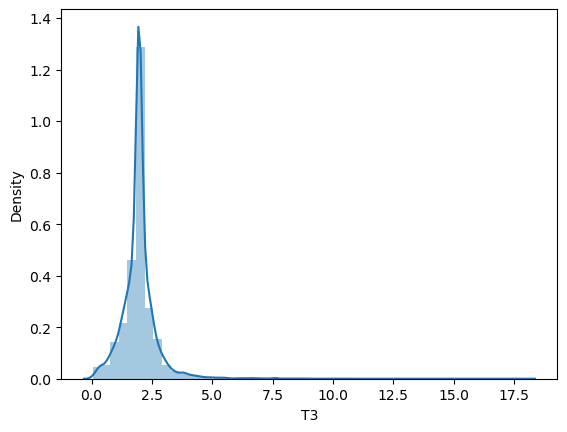

In [55]:
sns.distplot(df['T3'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TT4', ylabel='Density'>

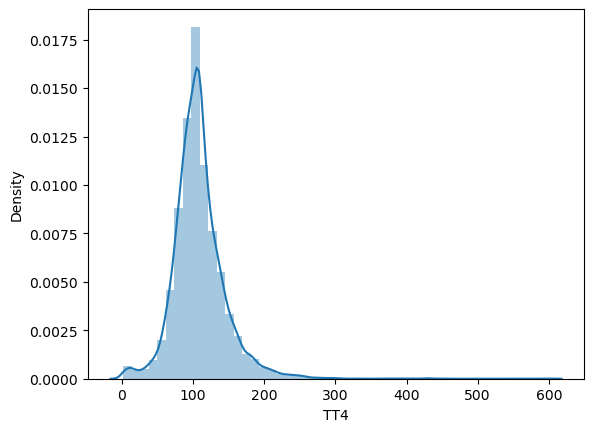

In [56]:
sns.distplot(df['TT4'])

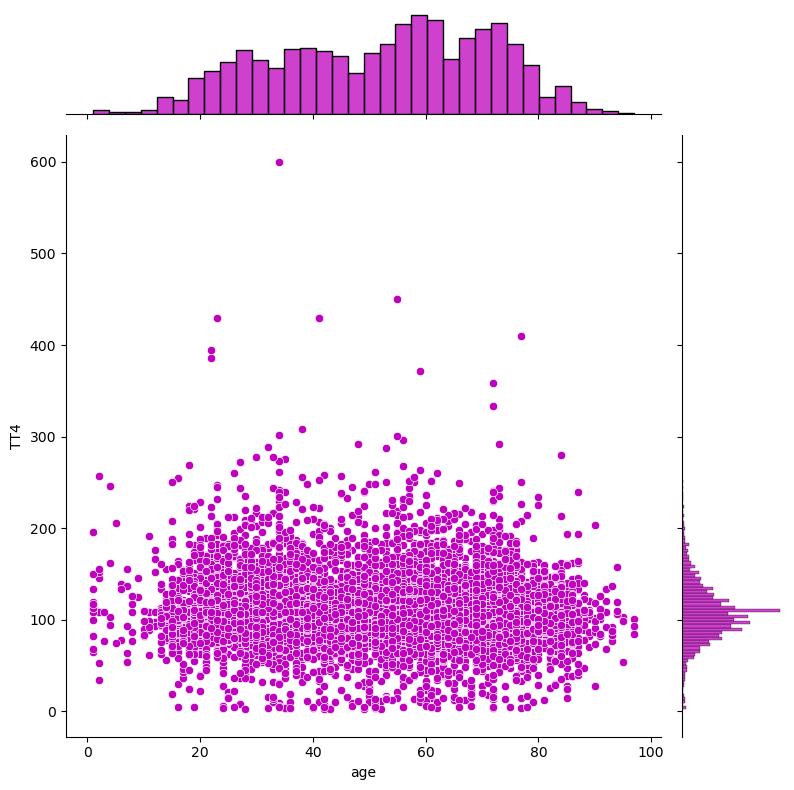

In [63]:
sns.jointplot(x= new_df['age'], y='TT4', data=df, kind='scatter', height=8, color='m')

<AxesSubplot:>

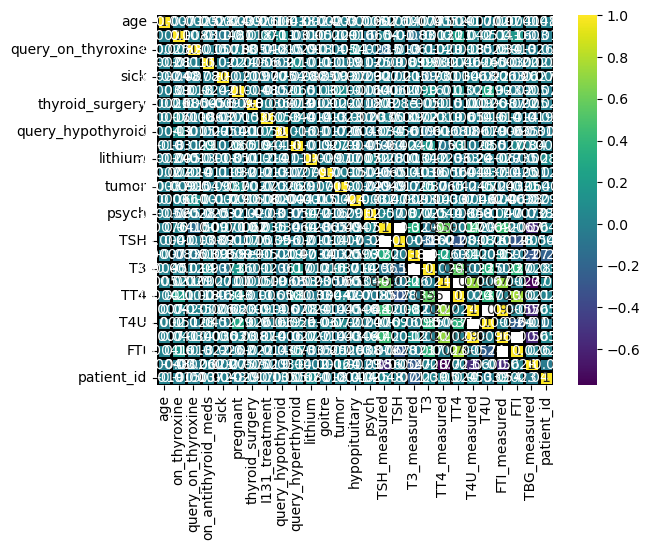

In [28]:
sns.heatmap(df_corr, cmap='viridis', linecolor='k', linewidths=2, annot=True)

# **Data Scaling**

In [25]:
def min_max_scaling(array):
    min_val = np.min(array)
    max_val = np.max(array)
    scaled_array = (array - min_val) / (max_val - min_val)
    return scaled_array

In [26]:
array = df.TSH
scaled_array = min_max_scaling(array)
print(scaled_array)

0       0.000557
1       0.003009
2       0.009837
3       0.009837
4       0.009837
          ...   
9167    0.009837
9168    0.009837
9169    0.009837
9170    0.009837
9171    0.009837
Name: TSH, Length: 9172, dtype: float64


In [27]:
array = df.T3
scaled_array = min_max_scaling(array)
print(scaled_array)

0       0.106999
1       0.103064
2       0.106999
3       0.106999
4       0.106999
          ...   
9167    0.106999
9168    0.106999
9169    0.106999
9170    0.106999
9171    0.106999
Name: T3, Length: 9172, dtype: float64


In [28]:
array = df.age
scaled_array = min_max_scaling(array)
print(scaled_array)

0       0.000427
1       0.000427
2       0.000610
3       0.000534
4       0.000473
          ...   
9167    0.000839
9168    0.000320
9169    0.001038
9170    0.000702
9171    0.000458
Name: age, Length: 9172, dtype: float64


In [29]:
array = df.TT4
scaled_array = min_max_scaling(array)
print(scaled_array)

0       0.178429
1       0.210702
2       0.178429
3       0.178429
4       0.178429
          ...   
9167    0.103679
9168    0.148829
9169    0.185619
9170    0.122074
9171    0.107023
Name: TT4, Length: 9172, dtype: float64


In [30]:
array = df.T4U
scaled_array = min_max_scaling(array)
print(scaled_array)

0       0.373174
1       0.373174
2       0.373174
3       0.373174
4       0.373174
          ...   
9167    0.305556
9168    0.347222
9169    0.509259
9170    0.314815
9171    0.393519
Name: T4U, Length: 9172, dtype: float64


In [31]:
array = df.FTI
scaled_array = min_max_scaling(array)
print(scaled_array)

0       0.127604
1       0.127604
2       0.127604
3       0.127604
4       0.127604
          ...   
9167    0.085948
9168    0.110960
9169    0.099591
9170    0.098454
9171    0.072306
Name: FTI, Length: 9172, dtype: float64


# **Statistics**

In [32]:
df.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of       age sex  on_thyroxine  query_on_thyroxine  on_antithyroid_meds  sick  \
0      29   F             0                   0                    0     0   
1      29   F             0                   0                    0     0   
2      41   F             0                   0                    0     0   
3      36   F             0                   0                    0     0   
4      32   F             0                   0                    0     0   
...   ...  ..           ...                 ...                  ...   ...   
9167   56   M             0                   0                    0     0   
9168   22   M             0                   0                    0     0   
9169   69   M             0                   0                    0     0   
9170   47   F             0                   0                    0     0   
9171   31   M             0                   0                    0     0   



In [33]:
df['age'].mean()

73.55582206716092

In [34]:
df['TSH'].mean()

5.218402753781466

In [35]:
df['T3'].mean()

1.970628805724606

In [36]:
df['TT4'].mean()

108.7003046964492

In [37]:
df['T4U'].mean()

0.9760557216310008

In [38]:
df.cov

<bound method DataFrame.cov of       age sex  on_thyroxine  query_on_thyroxine  on_antithyroid_meds  sick  \
0      29   F             0                   0                    0     0   
1      29   F             0                   0                    0     0   
2      41   F             0                   0                    0     0   
3      36   F             0                   0                    0     0   
4      32   F             0                   0                    0     0   
...   ...  ..           ...                 ...                  ...   ...   
9167   56   M             0                   0                    0     0   
9168   22   M             0                   0                    0     0   
9169   69   M             0                   0                    0     0   
9170   47   F             0                   0                    0     0   
9171   31   M             0                   0                    0     0   

      pregnant  thyroid_surgery 

In [39]:
df.var

<bound method NDFrame._add_numeric_operations.<locals>.var of       age sex  on_thyroxine  query_on_thyroxine  on_antithyroid_meds  sick  \
0      29   F             0                   0                    0     0   
1      29   F             0                   0                    0     0   
2      41   F             0                   0                    0     0   
3      36   F             0                   0                    0     0   
4      32   F             0                   0                    0     0   
...   ...  ..           ...                 ...                  ...   ...   
9167   56   M             0                   0                    0     0   
9168   22   M             0                   0                    0     0   
9169   69   M             0                   0                    0     0   
9170   47   F             0                   0                    0     0   
9171   31   M             0                   0                    0     0   

 

In [40]:
df['T4U'].var()

0.03660306291938909

In [41]:
df_corr = df.corr()
df_corr

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,patient_id
age,1.000000,-0.007095,-0.002530,-0.002831,-0.002415,-0.003892,-0.002631,-0.001645,-0.004266,0.017798,...,-7.746134e-04,3.692963e-03,5.200635e-03,4.121774e-03,7.014103e-03,-2.044664e-03,6.984358e-03,4.107966e-03,-0.004768,0.018506
on_thyroxine,-0.007095,1.000000,0.008254,-0.010508,-0.047841,0.010495,0.018294,0.071490,0.111985,-0.031057,...,-8.341417e-02,-9.782635e-04,3.090172e-02,2.094225e-01,4.201970e-02,4.981314e-02,4.111679e-02,1.544658e-01,-0.030304,-0.014679
query_on_thyroxine,-0.002530,0.008254,1.000000,-0.014741,-0.007789,0.017561,0.005426,-0.017845,-0.015177,-0.029370,...,-6.147734e-02,-1.001823e-02,2.930694e-02,-1.770850e-03,3.450614e-02,-2.760837e-02,3.429001e-02,1.300265e-02,-0.025904,-0.012530
on_antithyroid_meds,-0.002831,-0.010508,-0.014741,1.000000,-0.022341,0.024049,-0.005649,0.006258,-0.026879,0.101701,...,3.880515e-02,8.660680e-02,2.688081e-03,4.484930e-03,-2.643707e-03,4.275892e-02,-2.959889e-03,-2.117158e-02,-0.002111,0.007232
sick,-0.002415,-0.047841,-0.007789,-0.022341,1.000000,-0.021446,-0.009688,-0.027046,0.005381,-0.027746,...,5.935992e-03,-6.221628e-02,-1.132283e-03,-3.337500e-02,6.762280e-03,-2.117574e-02,6.255556e-03,-2.512901e-02,0.002731,0.004805
pregnant,-0.003892,0.010495,0.017561,0.024049,-0.021446,1.000000,-0.004766,-0.014885,-0.021476,0.064870,...,9.859107e-03,1.371963e-01,1.022323e-02,1.302084e-01,2.304978e-02,2.817757e-01,2.284694e-02,-1.943290e-02,-0.005686,-0.028678
thyroid_surgery,-0.002631,0.018294,0.005426,-0.005649,-0.009688,-0.004766,1.000000,0.003588,-0.000733,0.019424,...,8.788897e-05,-8.748090e-03,1.466955e-02,-1.087876e-02,9.033396e-03,2.490343e-02,8.739962e-03,-2.128195e-02,-0.005219,-0.016960
I131_treatment,-0.001645,0.071490,-0.017845,0.006258,-0.027046,-0.014885,0.003588,1.000000,0.052542,0.044215,...,7.156720e-03,1.983110e-02,1.947247e-02,-6.417167e-03,1.402587e-02,1.515877e-02,1.371089e-02,-1.317188e-02,-0.018774,-0.013482
query_hypothyroid,-0.004266,0.111985,-0.015177,-0.026879,0.005381,-0.021476,-0.000733,0.052542,1.000000,0.015586,...,-1.925301e-02,-5.044708e-02,6.762510e-03,-1.790014e-02,-6.736824e-03,1.761667e-02,-5.971030e-03,-3.294397e-02,-0.031481,-0.005512
query_hyperthyroid,0.017798,-0.031057,-0.029370,0.101701,-0.027746,0.064870,0.019424,0.044215,0.015586,1.000000,...,4.691678e-02,1.534633e-01,-5.279005e-02,9.727749e-02,-2.781709e-02,5.137383e-02,-2.717025e-02,6.868722e-02,0.040455,0.006709


# **Linear discriminant Analysis (LDA)**

In [94]:
#df=df.replace({"A":0,"B":1, "C":2, "D": 3, "E": 4, "G":5, "H":6, "I": 7,
 #              "J":8, "K":9, "L":10, "M":11, "N":12, "O":13, "P":14, "Q":15,
  #             "R": 16, "S":17, "T":18})

In [108]:
cols=df.columns
cols

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'referral_source', 'target',
       'patient_id'],
      dtype='object')

In [109]:
features=df[['age', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH',
        'T3','TT4', 'T4U',
        'FTI']]
features
cols=['lithium','goitre', 'tumor', 'hypopituitary', 'psych']
encoded={'f':0,"t":1}
for col in cols: 
    features[col]=[encoded[i] for i in features[col].values]

KeyError: 0

In [110]:
features

,age,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
0,29,0,0,0,0,0,0.300000,1.970629,108.700305,0.976056,113.640746
1,29,0,0,0,0,0,1.600000,1.900000,128.000000,0.976056,113.640746
2,41,0,0,0,0,0,5.218403,1.970629,108.700305,0.976056,113.640746
3,36,0,0,0,0,0,5.218403,1.970629,108.700305,0.976056,113.640746
4,32,0,0,0,0,0,5.218403,1.970629,108.700305,0.976056,113.640746
...,...,...,...,...,...,...,...,...,...,...,...
9167,56,0,0,0,0,0,5.218403,1.970629,64.000000,0.830000,77.000000
9168,22,0,0,0,0,0,5.218403,1.970629,91.000000,0.920000,99.000000
9169,69,0,0,0,0,0,5.218403,1.970629,113.000000,1.270000,89.000000
9170,47,0,0,0,0,0,5.218403,1.970629,75.000000,0.850000,88.000000


In [111]:
target_encoded={j:i for i,j in enumerate(df['target'].unique())}
target=[target_encoded[i] for i in df['target'].values]
target=np.array(target).reshape(-1,1)

In [112]:
x=features.values

In [113]:
x=StandardScaler().fit_transform(x)

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,target,test_size=0.3)

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [116]:
rct=RandomForestClassifier(max_depth=31,n_estimators=5000).fit(x_train,y_train)

C:\Users\Nouran Mousa\AppData\Local\Temp\ipykernel_19784\3328901907.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rct=RandomForestClassifier(max_depth=31,n_estimators=5000).fit(x_train,y_train)


In [117]:
pred=rct.predict(x_test)

In [118]:
report=classification_report(y_test.reshape(-1,),pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2042
           1       0.27      0.09      0.14        33
           2       0.88      0.97      0.92        72
           3       0.56      0.33      0.42        15
           4       0.66      0.47      0.55        49
           5       0.81      0.73      0.77       110
           6       0.38      0.09      0.14        34
           7       0.45      0.52      0.48        29
           8       0.69      0.93      0.79        91
           9       0.87      0.89      0.88       137
          10       0.60      0.81      0.69        36
          11       1.00      1.00      1.00         2
          12       0.59      0.38      0.46        34
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         4
          15       1.00      0.60      0.75        15
          16       1.00      0.50      0.67         2
          17       0.50    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
